# Introduction

### Section 1:

- What is regression?
- What is data?
- Where to look for data?
- Libraries
- Data at a glance

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

A dataset can be thought as a matrix where each row represents a record (vector) and each column represents a feature

![matrix](matrix-1.png)

notes:
no data dictionary present
assumptions:
- id - unique id for house
- price - price of the house
- bedrooms - number of bedrooms in the house
- bathroom - number of bathrooms in the house
- sqft_living - sqft the house itself is in the land
- sqft_lot - sqft of othe house as a whole
- waterfront - (binary) any waterfront property
- view - (binary) does house has a view
- grade - structural quality of the house

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(df.shape)
print(df.columns)

(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
#df = df.dropna()
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Section 2

- Exploring and visualizing data 

In [ ]:
df.plot(kind="scatter", x="long", y="lat", grid=True,
             label="price",
             c="price", cmap="viridis", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
#save_fig("housing_prices_scatterplot")  # extra code
plt.show()

In [ ]:
#for the sake of simplicity lets drop a few features
todrop = ['sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15','id']

# Drop the specified columns
df.drop(columns=todrop, inplace=True)

# Verify the resulting DataFrame
df.head()

In [ ]:
import seaborn as sns
# https://seaborn.pydata.org/api.html
# refer to link for furthur details about seaborn plots

columns_for_use = ['yr_built','price','bedrooms', 'bathrooms', 'sqft_living', 'floors','grade','sqft_lot']

In [ ]:
sns.pairplot(df[columns_for_use]);

Goal to look for any feature that might have multicollinearity

In [ ]:
corr_matrix = df[columns_for_use].corr()
corr_matrix

In [ ]:
corr_matrix["price"].sort_values(ascending=False)

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap="plasma")
plt.show()

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

For other exploratory analysis, can look utilize a box plot for outlier detection or a histogram of each column for frequence

In [ ]:
# Other functionss in pandas
# https://pandas.pydata.org/docs/
# refer to link for futhur details about pandas functions

df['price'].max()
df['price'].min()
df['price'].mean()
df['price'].medium()
df['price'].std()
df['price'].count()


df.index() # retrieve index of a variable 

df.iloc[0] #refer row by index
df.loc['r'] #refer to row by label

#iterate through a index of a row
for price in df['price']:
    print(price)

### Section 3

- Partitioning Data
- Understanding the functions in sklearn
- Metric vs Loss
- Supervised vs Unsupervised
- Overfitting and Underfitting
- K-Fold

![training2](training2.png)

In [11]:
from sklearn.model_selection import train_test_split

#uses arrays double [] to put columns in a array 
X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

![standardize](OIP.jpg)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

![methods](methods.png)

- fit, storing instances of train data
- predict, function to perform algorithm on model
- set_params, manually setting parameters 
- get_params, retriving the parameters used

![tradeoff](tradeoff.png)

### Section 4

![formula](regress_formula.jpg)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Train the model
model_slm = LinearRegression() #OLS
model_slm.fit(X_train, y_train)

# Predict on test data
y_pred = model_slm.predict(X_test)

X_test_array = X_test['sqft_living'].values

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_array, y_test, color='b', alpha=0.3, label='Actual')
plt.plot(X_test_array, y_pred, color='r', label='Trend line')
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

In [ ]:
coef = model_slm.coef_[0]
intercept = model_slm.intercept_

print(f"Equation of the trendline: y = {coef:.3}x + {intercept:.3}")

##### Metrics and Loss

![loss](modified.png)

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R^2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

##### Residuals

In [ ]:
y_test_array = y_test.to_numpy()
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))  # Define figure size
sns.scatterplot(x=X_test_array, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('sqft_living')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Residual plot tells us about the goodness of fit for the model (how well the model perform):
   - Closer to 0 the better
   - If there is homoscedasticity (does it remain close to a trend line) or hetroscedasticity (scatter a cloud pattern as it continues)
   - A pattern (need to add a degree to the function)
   - Outliers

###### Using statmodel

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#define response variable
y = df['price']

#define explanatory variable
x = df[['sqft_living']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

est = smf.ols('price ~ sqft_living', df).fit()
est.summary().tables[1]

##### Stochastic Gradient Descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor

In [ ]:
from sklearn.linear_model import SGDRegressor

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = sgd_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the coefficients
coefficients = sgd_regressor.coef_

# Get the intercept
intercept = sgd_regressor.intercept_

K-fold or AutoMl for parameters

https://www.statology.org/k-fold-cross-validation-in-python/

**Note:**

![Gradient](Gradient.png)

![saddle](saddle.png)

![formula](Cost-Function.jpg)

Gradient is the partial derivatives of the loss function in respect to the parameters.
Learning rate is rate where one "step" is taken for each iteration.
Gradient Descent is iterative, will keep subtracting until parameters no longer change or barely change.
Why does it work? The goal of any model is to minimize loss or error. Concept being if the parameter doesn't change, it means that the error has reached it's minimum.

In [ ]:
from sklearn.model_selection import KFold

model = model_type()

# Define the number of folds
k = 5

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store scores for each fold
scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    tree_reg.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate cost
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Calculate average cost
avg_rmse = np.mean(rmse_scores)

print(f"Average RMSE: {avg_rmse}")

### Section 5: Multi-variate

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the dataset
X = df[['bathrooms', 'bedrooms','grade', 'sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model2 = LinearRegression() 
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test) 

print("Intercept: ", model2.intercept_)
print("Coefficients: ", model2.coef_)

print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [ ]:
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y,X).fit()
print(model.summary())

In [ ]:
est = smf.ols('price ~ sqft_living + bathrooms + grade + bedrooms', df).fit()
est.summary().tables[1]

In [ ]:
from sklearn.linear_model import SGDRegressor

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = sgd_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the coefficients
coefficients = sgd_regressor.coef_

# Get the intercept
intercept = sgd_regressor.intercept_

### Section 6: Outside of linear regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)

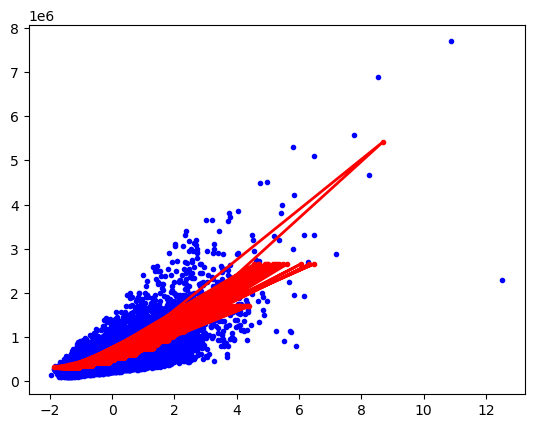

In [17]:
def plot_regression_predictions(tree_reg, X_train, y_train, X_test, y_test):
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    
    plt.plot(X_train, y_train, "b.")
    plt.plot(X_test, y_pred, "r.-", linewidth=2)

plot_regression_predictions(tree_reg, scaled_train, y_train, scaled_test, y_test)

Not a good model